In [19]:
import pandas as pd
df =  pd.read_csv(r"INE_2024_2074.csv", sep=";")
df = df[(df["Periodo"] >= 2025) & (df["Periodo"] <= 2029) & (df["Sexo"] == "Total") & (df["Edad"] != "Todas las edades")]

#En relación a los totales poblacionales
# Reemplazar el punto de miles y cambiar la coma decimal por punto
df["Total"] = df["Total"].str.replace(".", "", regex=False)  # elimina los puntos de miles
df["Total"] = df["Total"].str.replace(",", ".", regex=False) # convierte la coma decimal en punto

# Convertir a int pasando por float para truncar
df["Total"] = df["Total"].astype(float).truncate().astype(int)

#En relación a las edades
df["Edad"] = df["Edad"].str.extract(r'(\d+)')  # extrae solo los números
df["Edad"] = df["Edad"].astype(int)

df = df[df["Edad"] >= 18]
df

,Sexo,Edad,Periodo,Total
1014,Total,18,2029,563058
1015,Total,18,2028,565544
1016,Total,18,2027,581045
1017,Total,18,2026,552864
1018,Total,18,2025,539744
...,...,...,...,...
5196,Total,100,2029,25053
5197,Total,100,2028,22691
5198,Total,100,2027,21011
5199,Total,100,2026,19301


In [20]:
# Añado las clases de edad que construimos en nuestro análisis
def clase_edad(x):
    if x < 18:
        return "unknown"
    elif x >= 18 and x <=24: 
        return '18-24'
    elif  x >= 25 and x <= 34:
        return '25-34'
    elif  x >= 35 and x <= 44:
        return '35-44'
    elif  x >= 45 and x <= 54:
        return '45-54'
    elif  x >= 55 and x <= 64:
        return '55-64'
    else:
        return '65+' #Como no hay edades inferiores a 18 no va dar problemae

df['Clase de edad'] = df['Edad'].apply(clase_edad)
df_final = df.groupby(["Periodo","Clase de edad"]).Total.sum().reset_index()
# df[(df["Periodo"] == 2025) & (df["Clase de edad"] == "18-24")]

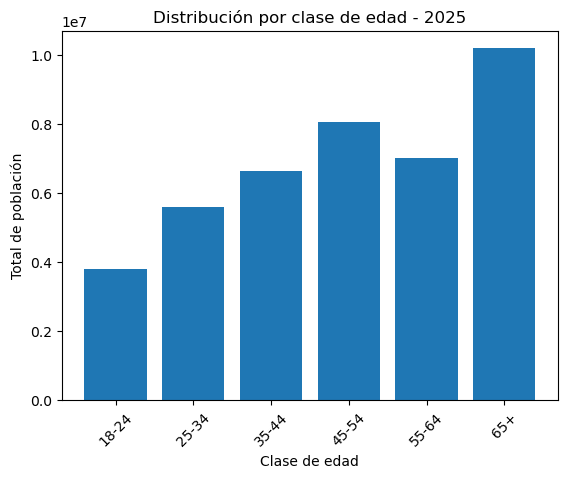

In [21]:
import matplotlib.pyplot as plt

# Filtrar un año específico
df_2025 = df_final[(df_final["Periodo"] == 2025)]

plt.bar(df_2025["Clase de edad"], df_2025["Total"])
plt.title("Distribución por clase de edad - 2025")
plt.xlabel("Clase de edad")
plt.ylabel("Total de población")
plt.xticks(rotation=45)
plt.show()




In [22]:
import pandas as pd
df_banca2024 =  pd.read_csv(r"C:/Users/Pau/Desktop/BCNActiva/BCNActiva ADD/Simulador Empresa/ProjecteData/Equip_16/Data/banca_06.10_dataset.csv")

i = 0
while i < 5:
    i += 1
    name = f"df_banca{2024+i}"
    globals()[name] = df_banca2024.copy()
    globals()[name]["age"] = globals()[name]["age"] + i

df_banca2029


,id,age,job,marital,education,default,balance,housing,loan,contact,...,campaign,pdays,previous,poutcome,deposit,Clase de edad,Perfil,month_num,date,weekday
0,1,64.0,admin.,married,secondary,no,2343,yes,no,unknown,...,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Monday
1,2,61.0,admin.,married,secondary,no,45,no,no,unknown,...,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Monday
2,3,46.0,technician,married,secondary,no,1270,yes,no,unknown,...,1,-1,0,unknown,yes,35-44,Adultxs,5,2008-05-05,Monday
3,4,60.0,services,married,secondary,no,2476,yes,no,unknown,...,1,-1,0,unknown,yes,55-64,Gen Z & Boomers,5,2008-05-05,Monday
4,5,59.0,admin.,married,tertiary,no,184,no,no,unknown,...,2,-1,0,unknown,yes,45-54,Divorciadxs,5,2008-05-05,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26171,26383,40.0,admin.,single,secondary,no,182,yes,no,unknown,...,1,-1,0,unknown,no,35-44,Adultxs,6,2008-06-03,Tuesday
26172,26384,58.0,management,married,unknown,no,527,yes,no,cellular,...,3,-1,0,unknown,no,45-54,Divorciadxs,7,2008-07-23,Wednesday
26173,26385,31.0,student,single,tertiary,no,39,no,no,cellular,...,3,-1,0,unknown,yes,25-34,Millenials,5,2008-05-26,Monday
26174,26386,91.0,retired,married,primary,no,5236,no,no,telephone,...,2,-1,0,unknown,yes,65+,Gen Z & Boomers,4,2009-04-01,Wednesday


In [23]:
def clase_edad(x):
    if x < 18:
        return "unknown"
    elif x >= 18 and x <=24: 
        return '18-24'
    elif  x >= 25 and x <= 34:
        return '25-34'
    elif  x >= 35 and x <= 44:
        return '35-44'
    elif  x >= 45 and x <= 54:
        return '45-54'
    elif  x >= 55 and x <= 64:
        return '55-64'
    else:
        return '65+' #Como no hay edades inferiores a 18 no va dar problemae


def perfil(x):
    if x == "unknown":
        return "unknown"
    elif x == '18-24': 
        return "Gen Z & Boomers"
    elif  x == '25-34':
        return 'Millenials'
    elif  x == '35-44':
        return 'Adultxs'
    elif  x == '45-54':
        return 'Divorciadxs'
    elif  x == '55-64':
        return "Gen Z & Boomers"
    elif x == '65+':
        return "Gen Z & Boomers" #Como no hay edades inferiores a 18 no va dar problemae



for year in range(2025, 2030):
    name = f"df_banca{year}"
    df = globals()[name]
    df['Clase de edad'] = df['age'].apply(clase_edad)
    df['Perfil'] = df['Clase de edad'].apply(perfil)

